In [1]:
import sacc
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import h5py


In [2]:
Shear = h5py.File('/global/cscratch1/sd/jsanch87/TXPipe_data/shear_catalog_small.h5','r')
Photometry = h5py.File('/global/cscratch1/sd/jsanch87/TXPipe_data/photometry_catalog_small.h5','r')

In [3]:
print(Shear['metacal'].keys())

print(Photometry['photometry'].keys())

<KeysViewHDF5 ['dec', 'id', 'mcal_T', 'mcal_T_1m', 'mcal_T_1p', 'mcal_T_2m', 'mcal_T_2p', 'mcal_T_err', 'mcal_T_err_1m', 'mcal_T_err_1p', 'mcal_T_err_2m', 'mcal_T_err_2p', 'mcal_flags', 'mcal_g1', 'mcal_g1_1m', 'mcal_g1_1p', 'mcal_g1_2m', 'mcal_g1_2p', 'mcal_g2', 'mcal_g2_1m', 'mcal_g2_1p', 'mcal_g2_2m', 'mcal_g2_2p', 'mcal_mag_err_i', 'mcal_mag_err_i_1m', 'mcal_mag_err_i_1p', 'mcal_mag_err_i_2m', 'mcal_mag_err_i_2p', 'mcal_mag_err_r', 'mcal_mag_err_r_1m', 'mcal_mag_err_r_1p', 'mcal_mag_err_r_2m', 'mcal_mag_err_r_2p', 'mcal_mag_err_z', 'mcal_mag_err_z_1m', 'mcal_mag_err_z_1p', 'mcal_mag_err_z_2m', 'mcal_mag_err_z_2p', 'mcal_mag_i', 'mcal_mag_i_1m', 'mcal_mag_i_1p', 'mcal_mag_i_2m', 'mcal_mag_i_2p', 'mcal_mag_r', 'mcal_mag_r_1m', 'mcal_mag_r_1p', 'mcal_mag_r_2m', 'mcal_mag_r_2p', 'mcal_mag_z', 'mcal_mag_z_1m', 'mcal_mag_z_1p', 'mcal_mag_z_2m', 'mcal_mag_z_2p', 'mcal_psf_T_mean', 'mcal_psf_g1', 'mcal_psf_g2', 'mcal_s2n', 'mcal_s2n_1m', 'mcal_s2n_1p', 'mcal_s2n_2m', 'mcal_s2n_2p', 'mean_z

In [4]:
#true_z = Photometry['photometry/redshift_true'].value
true_z = Shear['metacal/mean_z'].value

print(Photometry['photometry/redshift_true'].value)

[0.0437324  0.04661381 0.0479908  ... 0.67959261 0.67959261 0.67959261]


/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  from ipykernel import kernelapp as app
/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


In [5]:
tomo_input = h5py.File('/global/homes/c/chihway/TXPipe/data/example/outputs/shear_tomography_catalog_inputz.hdf5','r')
tomo_noinput = h5py.File('/global/homes/c/chihway/TXPipe/data/example/outputs/shear_tomography_catalog_no_inputz.hdf5','r')
tomo_lens = h5py.File('/global/homes/c/chihway/TXPipe/data/example/outputs/lens_tomography_catalog.hdf5','r')

In [6]:
input_bin = tomo_input['tomography/source_bin'].value
noinput_bin = tomo_noinput['tomography/source_bin'].value
lens_bin = tomo_lens['tomography/lens_bin'].value

/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if __name__ == '__main__':
/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  from ipykernel import kernelapp as app
/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  app.launch_new_instance()


/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1/envs/de

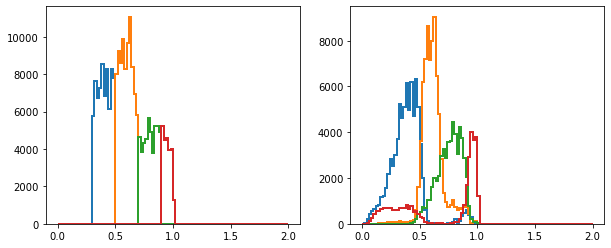

In [7]:
plt.figure(figsize=(10,4))
for i in range(4):
    plt.subplot(121)
    plt.hist(true_z[input_bin==i], range=(0,2), bins=100, histtype='step',lw=2)
    plt.subplot(122)
    plt.hist(true_z[noinput_bin==i], range=(0,2), bins=100, histtype='step',lw=2)

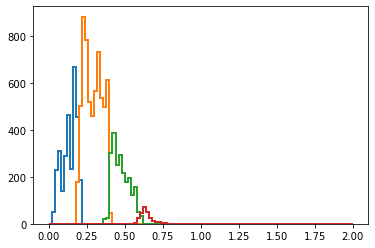

In [8]:
for i in range(4):
    plt.hist(true_z[lens_bin==i], range=(0,2), bins=100, histtype='step',lw=2)


(array([ 16723.,  62113.,  91070., 111180., 119277., 144324., 136276.,
         99496., 110806., 108735.]),
 array([0.02464604, 0.12278023, 0.22091441, 0.3190486 , 0.41718278,
        0.51531696, 0.61345115, 0.71158533, 0.80971952, 0.9078537 ,
        1.00598788]),
 <a list of 10 Patch objects>)

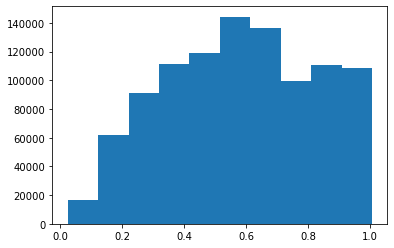

In [9]:
plt.hist(true_z)